# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Load the diabetes dataset from a CSV file

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

# Display the first few rows of the dataset

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Check for missing values in the dataset

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
import seaborn as sns


# Visualize the distribution of the 'Outcome' variable using a count plot

<Axes: xlabel='Outcome', ylabel='count'>

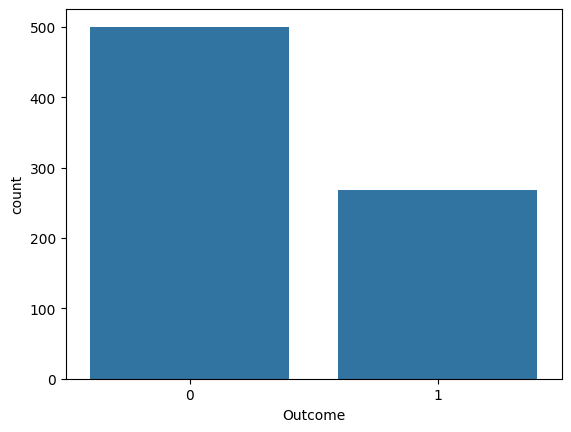

In [ ]:
sns.countplot(x = df.Outcome)

In [ ]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

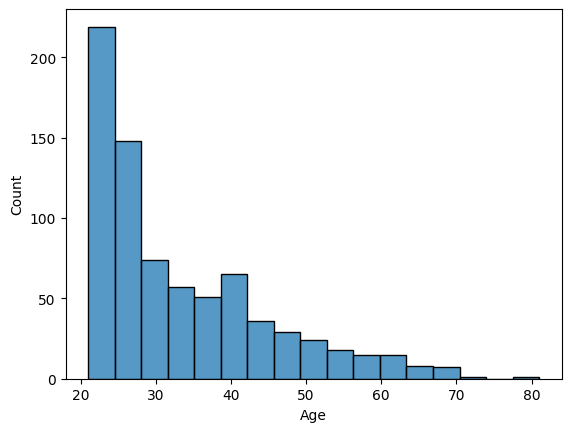

In [ ]:
sns.histplot(x = "Age",data = df)

# Create a logistic regression model

In [ ]:
model = linear_model.LogisticRegression()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Separate features (independent variables) and target variable (Outcome)

In [ ]:
x = df.drop(["Outcome"],axis = "columns")

In [ ]:
y = df.Outcome

# Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [ ]:
x_train.shape

(614, 8)

# Train the logistic regression model on the training set

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_test


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
492,4,99,68,38,0,32.8,0.145,33
654,1,106,70,28,135,34.2,0.142,22
123,5,132,80,0,0,26.8,0.186,69
636,5,104,74,0,0,28.8,0.153,48
91,4,123,80,15,176,32.0,0.443,34
...,...,...,...,...,...,...,...,...
275,2,100,70,52,57,40.5,0.677,25
743,9,140,94,0,0,32.7,0.734,45
151,4,114,65,0,0,21.9,0.432,37
611,3,174,58,22,194,32.9,0.593,36


# Make predictions on a sample input

In [ ]:
sample_prediction = model.predict([[0, 137, 68, 14, 148, 24.8, 0.143, 21]])
print("Sample Prediction:", sample_prediction)

Sample Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Evaluate the model's accuracy on the testing set

In [ ]:
accuracy = model.score(x_test, y_test)
print("Model Accuracy on Testing Set:", accuracy)

Model Accuracy on Testing Set: 0.7857142857142857
